In [4]:
import pandas as pd
import numpy as np
import glob
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
%matplotlib inline

In [2]:
def parseIp(cfs,I=0):
    ret=None
    I=I
    for cf in cfs:
        slist=[]
        elist=[]
        with open(cf,encoding="utf-16") as f:
            for i,l in enumerate(f):
                if "label" in l:
                    slist.append(i)
                if "FINISHED" in l:
                    elist.append(i)
        for s,e in zip(slist,elist):
            if ret is None:
                ret=pd.read_csv(cf,encoding="utf-16",skiprows=s,nrows=e-s-1)
                ret["eID"]=I
            else:
                tmp=pd.read_csv(cf,encoding="utf-16",skiprows=s,nrows=e-s-1)
                tmp["eID"]=I
                ret=ret.append(tmp)
            I+=1
        print(len(ret))
    print("Added {} events".format(I))
    return ret

csig=parseIp(glob.glob("dumpsig1m.csv"))
cbkg=parseIp(glob.glob("dumpbg1m.csv"))


1000000
Added 1 events
1000000
Added 1 events


In [3]:
csig.head()

label         x         y      z         px        py        pz     alpha  \
0      0  0.000002 -0.000004 -695.5  -5.109710  -7.04255  992443.0  0.000004   
1      0 -0.000007 -0.000005 -694.2 -11.579900   5.22403  697087.0  0.000004   
2      0 -0.000021  0.000008 -692.9  -2.243630   1.17939  271240.0  0.000006   
3      0 -0.000033  0.000013 -691.6   9.693620  -1.39008  271238.0  0.000007   
4      0 -0.000021 -0.000009 -690.3  -0.324991  15.13940   33331.5  0.000004   

   deltatheta    thetax    thetay        ip  eID  
0    0.000009 -0.000005 -0.000007  0.006099    0  
1    0.000018 -0.000017  0.000007  0.012655    0  
2    0.000009 -0.000008  0.000004  0.006498    0  
3    0.000036  0.000036 -0.000005  0.024935    0  
4    0.000454 -0.000010  0.000454  0.313602    0

In [63]:
def plot_bg_and_mc(pbg, pmc, id=0, step=1):
    df = pbg
    dZ = 1

    # mind the order!
    d0 = pd.DataFrame([
                df['z'][::step],
                df['x'][::step],
                df['y'][::step]],
                index=['z', 'x', 'y']).T
    numtracks = d0.shape[0]
    dd = pd.DataFrame([
            df['thetax'][::step]*dZ,
            df['thetay'][::step]*dZ],
            index=['x', 'y']).T
    dd.insert(loc=0, column='z', value=dZ)
    d1 = d0 + dd
    # print d0, d1
    C = plt.cm.Blues(0.5)
    lc_bg = Line3DCollection(list(zip(d0.values, d1.values)), colors=C, alpha=0.5, lw=2)

    df = pmc

    # mind the order!
    d0 = pd.DataFrame([
                df['z'],
                df['x'],
                df['y']],
                index=['z', 'x', 'y']).T
    numtracks = d0.shape[0]
    dd = pd.DataFrame([
            df['thetax']*dZ,
            df['thetay']*dZ],
            index=['x', 'y']).T
    dd.insert(loc=0, column='z', value=dZ)
    d1 = d0 + dd
    print(d1.shape)
    #print (d0)§
    C = plt.cm.Reds(0.5)
    lc_mc = Line3DCollection(list(zip(d0.values, d1.values)), colors=C, alpha=0.9, lw=2)
    
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca(projection='3d')
    ax.view_init(azim=-50, elev=10)
    ax.add_collection3d(lc_mc)
    ax.add_collection3d(lc_bg)
    
    # mind the order!
    ax.set_xlabel("z")
    ax.set_ylabel("x")
    ax.set_zlabel("y")  
    ax.set_xlim(-700,600)
    ax.set_ylim(-125,125)
    ax.set_zlim(-125,125)

(18314, 3)


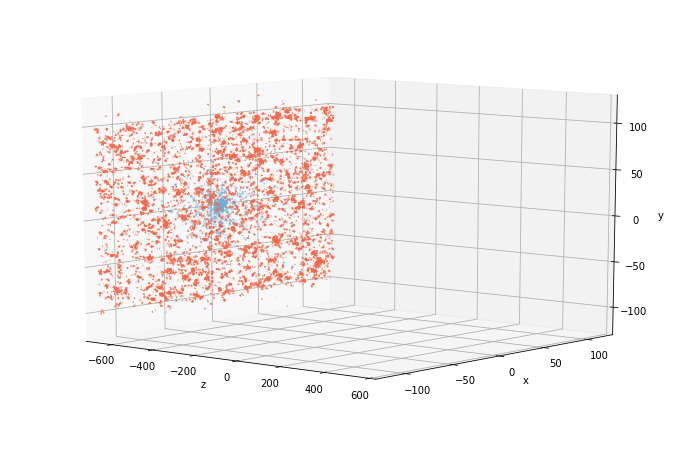

In [66]:
plot_bg_and_mc(csig[csig["z"]<-680],cbkg[cbkg["z"]<-680])